# Decision Tree Classifier and Grid Search

### 0. Setup and Import Data

In [1]:
cd ..

/home/jovyan/assignments/project_3


In [2]:
%run __init__.py

In [3]:
%matplotlib inline

In [4]:
cook_df = pd.read_pickle('data/cook_sample_df.pkl')
uci_df = pd.read_pickle('data/uci_df.pkl')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(uci_df.drop(['labels'], axis=1), uci_df['labels'], test_size=0.25)

In [6]:
X_train.shape

(330, 500)

### 2. Feature Selection

In [7]:
dt0 = DecisionTreeClassifier(max_depth=None)
dt1 = DecisionTreeClassifier(max_depth=2)
dt2 = DecisionTreeClassifier(max_depth=4)
dt3 = DecisionTreeClassifier(max_depth=6)

In [8]:
dt0.fit(X_train, y_train)
dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [9]:
display(dt0.score(X_test, y_test))
display(dt1.score(X_test, y_test))
display(dt2.score(X_test, y_test))
display(dt3.score(X_test, y_test))

0.58181818181818179

0.61818181818181817

0.55454545454545456

0.55454545454545456

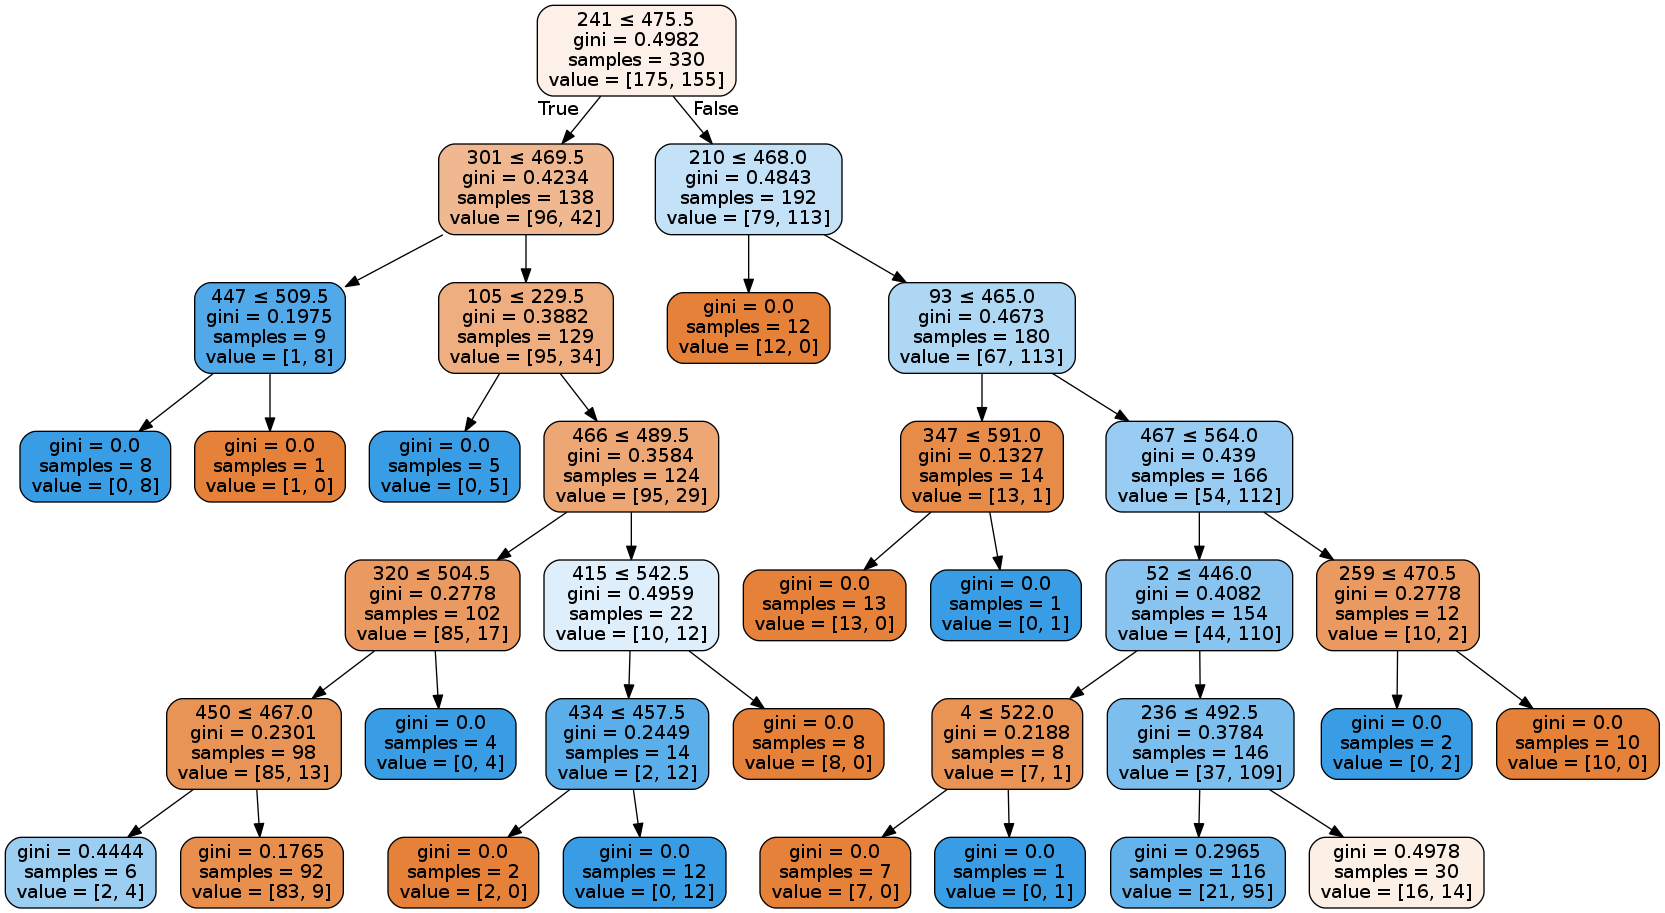

In [10]:
!pip install pydotplus
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dt3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [11]:
dt_params = {
        'max_depth': range(1,10),
        'max_features': range(1,50)
    }

In [12]:
dt_gs = GridSearchCV(DecisionTreeClassifier(), 
                      param_grid= dt_params, 
                      cv=5, verbose=1)

In [13]:
dt_gs.fit(X_train, y_train)

Fitting 5 folds for each of 441 candidates, totalling 2205 fits


[Parallel(n_jobs=1)]: Done 2205 out of 2205 | elapsed:   11.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 10), 'max_features': range(1, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [14]:
dt_gs.best_score_

0.59999999999999998

In [15]:
dt_gs.best_params_

{'max_depth': 2, 'max_features': 27}

In [16]:
dt_gs.grid_scores_

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.50000, std: 0.02875, params: {'max_depth': 1, 'max_features': 1},
 mean: 0.51515, std: 0.02535, params: {'max_depth': 1, 'max_features': 2},
 mean: 0.52424, std: 0.00742, params: {'max_depth': 1, 'max_features': 3},
 mean: 0.52424, std: 0.04556, params: {'max_depth': 1, 'max_features': 4},
 mean: 0.53636, std: 0.02268, params: {'max_depth': 1, 'max_features': 5},
 mean: 0.49091, std: 0.04020, params: {'max_depth': 1, 'max_features': 6},
 mean: 0.49394, std: 0.04753, params: {'max_depth': 1, 'max_features': 7},
 mean: 0.53939, std: 0.04454, params: {'max_depth': 1, 'max_features': 8},
 mean: 0.54242, std: 0.01134, params: {'max_depth': 1, 'max_features': 9},
 mean: 0.50909, std: 0.04020, params: {'max_depth': 1, 'max_features': 10},
 mean: 0.55758, std: 0.04111, params: {'max_depth': 1, 'max_features': 11},
 mean: 0.50606, std: 0.03662, params: {'max_depth': 1, 'max_features': 12},
 mean: 0.50909, std: 0.05637, params: {'max_depth': 1, 'max_features': 13},
 mean: 0.51515, std: 

In [17]:
results_dt1 = pd.DataFrame(dt_gs.cv_results_).sort_values('rank_test_score', ascending=True)
results_dt1.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
75,0.002824,0.000382,0.600000,0.658333,2,27,"{'max_depth': 2, 'max_features': 27}",1,0.575758,0.666667,...,0.575758,0.666667,0.560606,0.621212,0.651515,0.651515,0.000030,0.000004,0.036615,0.021481
128,0.003538,0.000381,0.581818,0.687879,3,31,"{'max_depth': 3, 'max_features': 31}",2,0.530303,0.696970,...,0.757576,0.731061,0.560606,0.651515,0.454545,0.640152,0.000032,0.000002,0.100778,0.036221
107,0.002490,0.000386,0.581818,0.682576,3,10,"{'max_depth': 3, 'max_features': 10}",2,0.560606,0.670455,...,0.606061,0.708333,0.515152,0.708333,0.606061,0.674242,0.000028,0.000002,0.039043,0.022397
166,0.003254,0.000386,0.581818,0.760606,4,20,"{'max_depth': 4, 'max_features': 20}",2,0.712121,0.787879,...,0.530303,0.795455,0.621212,0.738636,0.484848,0.765152,0.000030,0.000006,0.078788,0.029864
87,0.003149,0.000383,0.575758,0.628788,2,39,"{'max_depth': 2, 'max_features': 39}",5,0.590909,0.632576,...,0.530303,0.564394,0.545455,0.617424,0.590909,0.636364,0.000043,0.000006,0.033195,0.041217


In [18]:
dt_best1 = DecisionTreeClassifier(max_depth=2, max_features=27)
dt_best1.fit(X_train, y_train)
dt_best1.score(X_test, y_test)

0.59999999999999998

In [19]:
results_dt1.to_pickle('./data/dt_results_table.pkl')

### 3. Feature importance

In [20]:
feature = pd.DataFrame()
feature['Feature'] = X_train.columns
feature['Importance'] = dt_best1.feature_importances_
feature.sort_values('Importance', ascending=False).head(20)

,Feature,Importance
475,475,0.402014
336,336,0.382860
393,393,0.215126
0,0,0.000000
343,343,0.000000
341,341,0.000000
340,340,0.000000
339,339,0.000000
338,338,0.000000
337,337,0.000000


In [34]:
feature.to_pickle('./data/dt_feature_importance_df.pkl')

In [21]:
feature_no0 = feature[feature.Importance != 0]
feature_no0.shape

(3, 2)

In [22]:
feature_no0

,Feature,Importance
336,336,0.382860
393,393,0.215126
475,475,0.402014


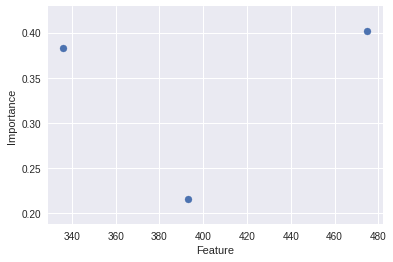

In [23]:
x2 = feature_no0['Feature']
y2 = feature_no0['Importance']

plt.scatter(x2, y2)
plt.xlabel('Feature')
plt.ylabel('Importance')

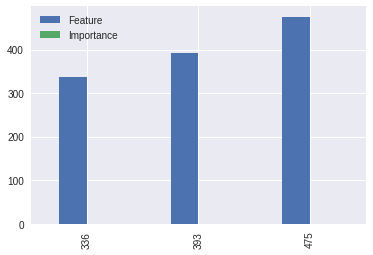

In [24]:
feature_no0.plot.bar()

In [25]:
dt_features = feature_no0['Feature'].tolist()

In [26]:
dt_features

[336, 393, 475]

In [ ]:
fig = plt.figure(figsize=(20,10))

for i, feature in enumerate(dt_features):
    fig.add_subplot(3,2,i+1)
    sns.heatmap(uci_df[feature], annot=True, cbar=False, square=True)

### 4. PCA

In [54]:
uci_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,labels
1071,483,453,531,462,445,474,487,480,504,475,...,481,483,350,451,555,475,483,505,506,-1
1297,490,470,448,489,499,474,494,478,515,478,...,477,510,381,558,469,492,496,525,461,1
386,489,487,534,482,537,484,439,476,450,487,...,484,494,602,516,507,477,468,530,448,-1
307,478,486,632,464,510,464,536,477,468,479,...,474,506,432,533,521,473,498,526,477,-1
750,478,493,545,493,500,471,480,476,483,486,...,481,491,587,515,539,478,481,521,521,1


In [29]:
dt_features

[336, 393, 475]

In [32]:
dt_features_df = pd.concat([uci_df[336], uci_df[393], uci_df[475], uci_df['labels']], axis=1)

In [33]:
dt_features_df.head()

,336,393,475,labels
1071,308,458,584,-1
1297,564,553,430,1
386,669,475,385,-1
307,594,497,354,-1
750,311,515,598,1


In [35]:
dt_features_df.to_pickle('dt_features_df.pkl')

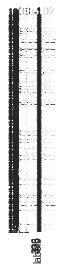

In [36]:
sns.heatmap(dt_features_df, annot=True, cbar=False, square=True)

In [ ]:
pca = PCA()
pca.fit(features_mask)

In [ ]:
features_mask_pca = pd.DataFrame(pca.transform(features_mask), 
                               columns=features_mask.columns,
                               index=features_mask.index)

In [ ]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(121)
plt.title("Original Data")
sns.heatmap(features_mask, annot=True, cbar=False, square=True)
fig.add_subplot(122)
plt.title("PCA transformed Data")
sns.heatmap(features_mask_pca, annot=True, cbar=False, square=True)

In [ ]:
features_mask.plot(kind='bar', figsize=(12,8))
plt.title("Original Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

features_mask_pca.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

In [ ]:
x = np.arange(1,7)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x, cumulative_explained_variance,'-o')
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))

plt.xlabel('PCA components')
plt.ylabel('Explained Variance')